### Import Libraries

In [86]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Reading Image

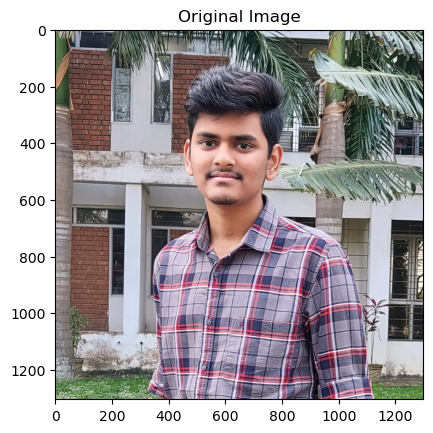

In [87]:
original_image = cv2.imread('images/my-image.jpeg')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

## Image Degradation

### 1. Blurring the Image

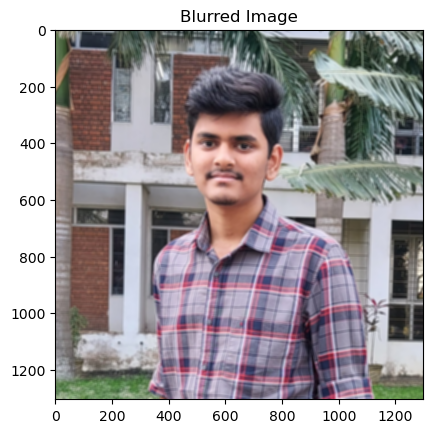

In [88]:
blur_image = cv2.blur(original_image, (10, 10))
plt.imshow(cv2.cvtColor(blur_image, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')
plt.show()

### 2. Adding Noise to the Image

In [89]:
mean, std = 0, 180
noise = np.zeros(original_image.shape, np.uint8)
cv2.randn(noise, mean, std)

array([[[  0,   0,   0],
        [  0,   0,   0],
        [246,   0,   0],
        ...,
        [ 76,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [157,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 91,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [103,   0,   0],
        [  0,   0,   0],
        [ 80,   0,   0]],

       ...,

       [[  0,   0,   0],
        [ 78,   0,   0],
        [ 15,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [255,   0,   0]],

       [[ 32,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 75,   0,   0],
        [  0,   0,   0],
        [ 73,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0,   0],
        [ 61,   0,   0],
        [  0,   0,   0]]

Text(0.5, 1.0, 'Noisy Image')

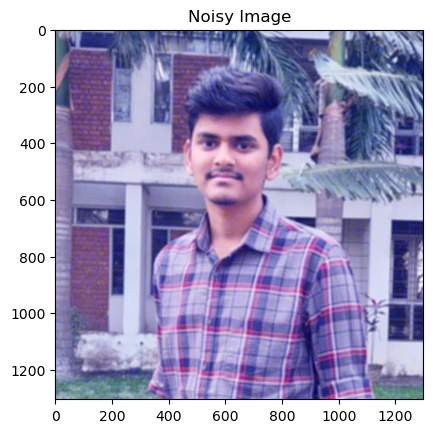

In [90]:
noise_image = cv2.add(blur_image, noise)
plt.imshow(cv2.cvtColor(noise_image, cv2.COLOR_BGR2RGB))
plt.title('Noisy Image')

### 3. Compression to jpeg and decompressing around 70-80% quality

In [91]:
#encode and decode jpeg 2000 compression
result, encoded_img = cv2.imencode('.jpg', noise_image, [int(cv2.IMWRITE_JPEG2000_COMPRESSION_X1000), 70])
degraded_img = cv2.imdecode(encoded_img, 1)

## Image Quality Difference

### Finding MSE

In [92]:
mse = np.mean((original_image - degraded_img) ** 2)
print("MSE: ", mse)

MSE:  86.48828460149463


### Finding PSNR

In [93]:
psnr = 10 * np.log10(255.0 ** 2 / mse)
print(f"PSNR: {psnr} dB")

PSNR: 28.76123077420499 dB
